## CNN使用 CIFAR10 資料集
# 1. Import Library

In [22]:
from keras.datasets import cifar10
import numpy as np
pathname='data/'

# 資料準備

In [2]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [ ]:
print("x_img_train_normalize:", x_img_train_normalize.shape)
print("x_img_test_normalize:", x_img_test_normalize.shape)

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [8]:
model = Sequential()

In [9]:
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

In [11]:
#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [ ]:
#分類器：平坦層、隱藏層、輸出層
model.add(Flatten())

In [14]:
model.add(Dense(1024, activation='relu')) #1024
model.add(Dropout(rate=0.25))

In [15]:
model.add(Dense(10, activation='softmax'))

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

# 載入之前訓練的模型

In [31]:
try:
    model.load_weights(pathname + "cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [18]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)          

Epoch 1/10
313/313 [==============================] - 61s 193ms/step - loss: 1.6427 - accuracy: 0.4021 - val_loss: 1.3260 - val_accuracy: 0.5287
Epoch 2/10
313/313 [==============================] - 61s 196ms/step - loss: 1.2199 - accuracy: 0.5648 - val_loss: 1.0815 - val_accuracy: 0.6200
Epoch 3/10
313/313 [==============================] - 59s 188ms/step - loss: 1.0475 - accuracy: 0.6278 - val_loss: 0.9795 - val_accuracy: 0.6560
Epoch 4/10
313/313 [==============================] - 63s 201ms/step - loss: 0.9464 - accuracy: 0.6667 - val_loss: 0.9257 - val_accuracy: 0.6788
Epoch 5/10
313/313 [==============================] - 62s 200ms/step - loss: 0.8693 - accuracy: 0.6935 - val_loss: 0.8538 - val_accuracy: 0.7035
Epoch 6/10
313/313 [==============================] - 63s 200ms/step - loss: 0.8047 - accuracy: 0.7156 - val_loss: 0.8275 - val_accuracy: 0.7140
Epoch 7/10
313/313 [==============================] - 64s 205ms/step - loss: 0.7367 - accuracy: 0.7407 - val_loss: 0.8191 - val_ac

In [19]:
import matplotlib.pyplot as plt
def show_acc_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

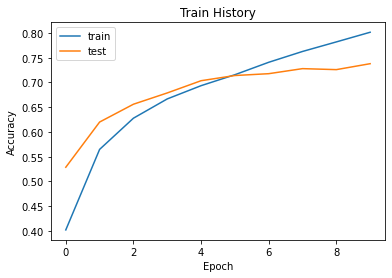

In [20]:
show_acc_train_history('accuracy','val_accuracy')

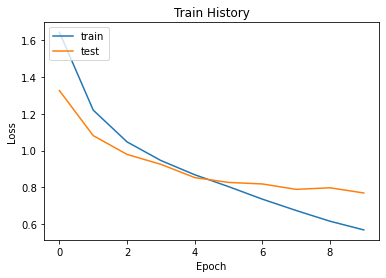

In [21]:
def show_loss_train_history(train_loss,test_loss):
    plt.plot(train_history.history[train_loss])
    plt.plot(train_history.history[test_loss])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
show_loss_train_history('loss','val_loss')

# 評估模型準確率

In [23]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]

0.730400025844574

# 進行預測

In [24]:
prediction=np.argmax(model.predict(x_img_test_normalize), axis=-1)

In [25]:
prediction[:10]

array([5, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

# 查看預測結果

In [26]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [27]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

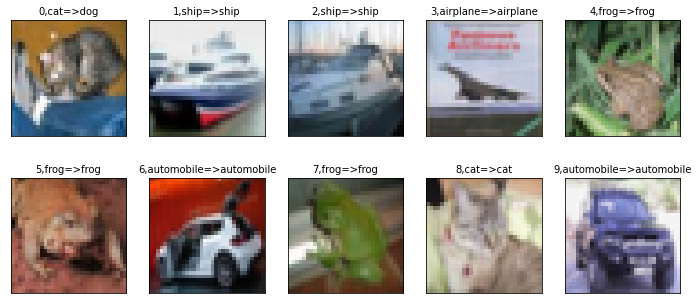

In [28]:
plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,0,10)

# 查看預測機率

In [ ]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [ ]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: dog


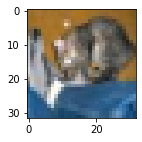

airplane Probability:0.007465564
automobile Probability:0.015635639
bird Probability:0.005982407
cat Probability:0.498363554
deer Probability:0.003531080
dog Probability:0.416205674
frog Probability:0.022361366
horse Probability:0.007877646
ship Probability:0.016660206
truck Probability:0.005916870


In [ ]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,0)

label: airplane predict: airplane


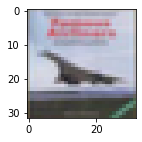

airplane Probability:0.871463656
automobile Probability:0.005883951
bird Probability:0.010034135
cat Probability:0.001085678
deer Probability:0.014123226
dog Probability:0.000002400
frog Probability:0.000171816
horse Probability:0.000040163
ship Probability:0.097017370
truck Probability:0.000177501


In [ ]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,3)

# confusion matrix

In [ ]:
prediction.shape

(10000,)

In [ ]:
y_label_test.shape

(10000, 1)

In [ ]:
y_label_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,667,32,109,13,16,9,46,8,61,39
1,15,820,9,7,3,4,50,7,17,68
2,60,4,511,40,72,84,191,20,10,8
3,8,10,119,313,55,193,271,18,4,9
4,24,5,154,35,422,35,278,38,9,0
5,6,4,115,106,48,544,143,28,2,4
6,0,2,33,24,12,9,916,2,0,2
7,11,1,64,37,83,114,67,610,0,13
8,106,75,37,20,5,11,33,2,682,29


In [ ]:
print(label_dict)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


# Save model to JSON

In [29]:
model_json = model.to_json()
with open(pathname+"cifarCnnModel.json", "w") as json_file:
    json_file.write(model_json)

# Save Weight to h5 

In [30]:
model.save_weights(pathname+"cifarCnnModel.h5")
print("Saved model to disk")

Saved model to disk
